In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
def plotCurrent(X, Rnk, Kmus):
    N, D = np.shape(X)
    K = np.shape(Kmus)[0]

    InitColorMat = np.matrix([[1, 0, 0], 
                              [0, 1, 0],   
                              [0, 0, 1],
                              [0, 0, 0],
                              [1, 1, 0], 
                              [1, 0, 1], 
                              [0, 1, 1]])

    KColorMat = InitColorMat[0:K]
    colorVec = Rnk.dot(KColorMat)
    muColorVec = np.eye(K).dot(KColorMat)

    plt.scatter(X[:,0], X[:,1], edgecolors=colorVec, marker='o', facecolors='none', alpha=0.3)
    plt.scatter(Kmus[:,0], Kmus[:,1], c=muColorVec, marker='D', s=50);

In [3]:
def calcSqDistances(X, Kmus):
    sqDmat = []
    for mean in Kmus:
        norm_array = []
        for point in X:
            norm_array.append(np.linalg.norm(point - mean))
        sqDmat.append(norm_array)
    return np.array(sqDmat).T

In [4]:
def determineRnk(sqDmat):
    mean_rank = []
    for i in sqDmat:
        cluster_val = []
        for j in i: 
            closest = i.min()
            if j == closest:
                cluster_val.append(1)
            else: 
                cluster_val.append(0)
        mean_rank.append(cluster_val)
    return np.array(mean_rank)

In [5]:
def recalcMus(X, Rnk):
    # Fill this
    N = np.shape(X)[0]#13569
    k = np.shape(Rnk)[1] #2
    
    
    Kmus = np.empty(shape=(k,np.shape(X)[1]),dtype='object')
    
    for i in range(k):#0-1
        cluster_sum = np.zeros(np.shape(X)[1])
        count = 0
        
        for j in range(N): #from 0-13568
            cluster_sum = cluster_sum + Rnk[j][i]*X[j]
            count += Rnk[j][i]
        
        Kmus[i] = cluster_sum/count ##gives the actual means 
        #Kmus.insert(Kmus, i, (cluster_sum/count))
        #np.put(Kmus,i, (cluster_sum/count)) ### this is producing the error 
    
    return Kmus

In [6]:
def runKMeans(K, csv_filepath):
    # Load cleaned data in
    data = pd.read_csv(csv_filepath)
    
    ##break the columns into lists of their own and combine then into one array
    #x_col = data[X_col]
    #y_col = data[Y_col]
    #dimensions = []
    
    #for num in range(0,len(data[X_col])):
        #dimensions.append([x_col[num], y_col[num]])
    
    #dimensions = np.array(dimensions)
    
    #X = dimensions 
    X = data.drop(['Unnamed: 0', 'Brand', 'Model', 'Added'], axis = 1)
    X = np.array(X)
    
    # Determine and store data set information; N is the number of objects, D is the number of attributes
    N,D = X.shape

    # Allocate space for the K mu vectors
    Kmus = np.zeros((K, D))
    
    # Initialize cluster centers by randomly picking points from the data
    rndinds = np.random.permutation(N)
    Kmus = X[rndinds[:K]];
    
    # Specify the maximum number of iterations to allow
    maxiters = 1000;

    for iter in range(maxiters):
        # Assign each data vector to closest mu vector 
        # Do this by first calculating a squared distance matrix where the n,k entry
        # contains the squared distance from the nth data vector to the kth mu vector

        # sqDmat will be an N-by-K matrix with the n,k entry as specfied above
        
        sqDmat = calcSqDistances(X, Kmus);
        
        # given the matrix of squared distances, determine the closest cluster center for each data vector 

        # R is the "responsibility" matrix
        # R will be an N-by-K matrix of binary values whose n,k entry is set as 
        # Specifically, the n,k entry is 1 if point n is closest to cluster k,
        # and is 0 otherwise
        Rnk = determineRnk(sqDmat)
        
        KmusOld = Kmus
        #plotCurrent(X, Rnk, Kmus)
        #plt.show()

        # Recalculate mu values based on cluster assignments
        Kmus = recalcMus(X, Rnk)

        # If old cluster means are relatively close to the new cluster means,then break.
        if sum(abs(KmusOld.flatten() - Kmus.flatten())) < 1e-6:
            break

    plotCurrent(X,Rnk,Kmus)
    
    rnk = Rnk.tolist()
    data['Rank'] = rnk
    return data

,Unnamed: 0,Brand,Model,Added,Width,Height,Depth,Volume,Band Count,RAM_TYPE_DDR SDRAM,...,ProtectionFromLiquids_6 Protection against powerful jets of water,ProtectionFromLiquids_7 Protected against immersion up to 1m of depth,ProtectionFromLiquids_8 Protected against immersion beyond 1m of depth,ProtectionFromLiquids_9 Protected against high temperature high pressure spray downs,ProtectionFromLiquids_Non-standard protection,ProtectionFromLiquids_Yes,DataIntegrity_Final,DataIntegrity_Incomplete,DataIntegrity_Preliminary,Rank
0,0,ZTE,Blade 20 Smart Global TD-LTE 128GB,1/1/2020 12:55,76.6,162.91,8.95,111686.20870,14,0,...,0,0,0,0,0,1,0,0,1,"[0, 1]"
1,1,Samsung,SM-G6200 Galaxy A6s Dual SIM TD-LTE CN 128GB,11/7/2018 22:32,76.5,156.30,8.40,100438.38000,21,0,...,0,0,0,0,0,1,0,0,1,"[0, 1]"
2,2,LG,LMV450VMB V50 ThinQ 5G TD-LTE US V450VMB,3/5/2019 23:31,76.1,159.20,8.30,100555.49600,20,0,...,0,0,1,0,0,0,1,0,0,"[0, 1]"
3,3,Huawei,Y5 Lite 2018 Dual SIM LTE LATAM CAG-LX3 / CAG-L23,5/10/2018 20:11,73.7,145.10,9.45,101057.07150,12,0,...,0,0,0,0,0,1,0,0,1,"[0, 1]"
4,4,Nokia,4.2 Dual SIM TD-LTE AM 32GB,8/14/2019 15:07,71.3,148.95,8.39,89102.93265,21,0,...,0,0,0,0,0,1,1,0,0,"[0, 1]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13564,13938,Samsung,SGH-i780,9/22/2007 23:57,61.3,115.90,12.90,91650.24300,4,0,...,0,0,0,0,0,1,1,0,0,"[0, 1]"
13565,13939,Vodafone,VPA Compact GPS,1/31/2007 13:51,58.2,108.00,18.40,115655.04000,7,0,...,0,0,0,0,0,1,1,0,0,"[0, 1]"
13566,13940,E-TEN,InfoTouch P603,4/3/2005 18:03,82.0,137.40,18.40,207309.12000,3,0,...,0,0,0,0,0,1,1,0,0,"[0, 1]"
13567,13941,Airis,T482,8/15/2008 18:05,62.0,125.00,14.00,108500.00000,4,0,...,0,0,0,0,0,1,1,0,0,"[0, 1]"


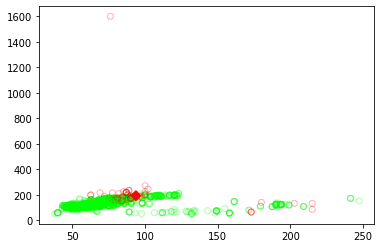

In [7]:
runKMeans(2,"encoded_smartphone_data.csv")

,Unnamed: 0,Brand,Model,Added,Width,Height,Depth,Volume,Band Count,RAM_TYPE_DDR SDRAM,...,ProtectionFromLiquids_6 Protection against powerful jets of water,ProtectionFromLiquids_7 Protected against immersion up to 1m of depth,ProtectionFromLiquids_8 Protected against immersion beyond 1m of depth,ProtectionFromLiquids_9 Protected against high temperature high pressure spray downs,ProtectionFromLiquids_Non-standard protection,ProtectionFromLiquids_Yes,DataIntegrity_Final,DataIntegrity_Incomplete,DataIntegrity_Preliminary,Rank
0,0,ZTE,Blade 20 Smart Global TD-LTE 128GB,1/1/2020 12:55,76.6,162.91,8.95,111686.20870,14,0,...,0,0,0,0,0,1,0,0,1,"[0, 0, 1]"
1,1,Samsung,SM-G6200 Galaxy A6s Dual SIM TD-LTE CN 128GB,11/7/2018 22:32,76.5,156.30,8.40,100438.38000,21,0,...,0,0,0,0,0,1,0,0,1,"[0, 0, 1]"
2,2,LG,LMV450VMB V50 ThinQ 5G TD-LTE US V450VMB,3/5/2019 23:31,76.1,159.20,8.30,100555.49600,20,0,...,0,0,1,0,0,0,1,0,0,"[0, 0, 1]"
3,3,Huawei,Y5 Lite 2018 Dual SIM LTE LATAM CAG-LX3 / CAG-L23,5/10/2018 20:11,73.7,145.10,9.45,101057.07150,12,0,...,0,0,0,0,0,1,0,0,1,"[0, 0, 1]"
4,4,Nokia,4.2 Dual SIM TD-LTE AM 32GB,8/14/2019 15:07,71.3,148.95,8.39,89102.93265,21,0,...,0,0,0,0,0,1,1,0,0,"[0, 0, 1]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13564,13938,Samsung,SGH-i780,9/22/2007 23:57,61.3,115.90,12.90,91650.24300,4,0,...,0,0,0,0,0,1,1,0,0,"[0, 0, 1]"
13565,13939,Vodafone,VPA Compact GPS,1/31/2007 13:51,58.2,108.00,18.40,115655.04000,7,0,...,0,0,0,0,0,1,1,0,0,"[0, 0, 1]"
13566,13940,E-TEN,InfoTouch P603,4/3/2005 18:03,82.0,137.40,18.40,207309.12000,3,0,...,0,0,0,0,0,1,1,0,0,"[1, 0, 0]"
13567,13941,Airis,T482,8/15/2008 18:05,62.0,125.00,14.00,108500.00000,4,0,...,0,0,0,0,0,1,1,0,0,"[0, 0, 1]"


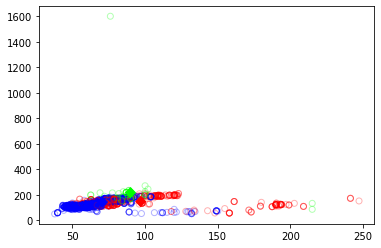

In [8]:
runKMeans(3,"encoded_smartphone_data.csv")